In [1]:
# import dependencies and check the versions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from platform import python_version
%matplotlib inline

print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', mpl.__version__)
print('Python version', python_version())

#for more clear plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

Numpy version: 1.12.1
Pandas version: 0.20.1
Matplotlib version: 2.0.2
Python version 3.6.1


In [2]:
data = pd.read_csv('cars2.csv', header=None)
data = data[[0,1,2,16]]
data = data.rename(columns={0:'year', 1:'make', 2:'model', 16:'distance'})

#remove the white spae  
data['make'] = data['make'].str.strip()
data['model'] = data['model'].str.strip()

In [3]:
grouped = data.groupby(['year', 'make']).max()
grouped

model  distance
year make                                             
2012 MITSUBISHI                       i-MiEV       100
     NISSAN                             LEAF       117
2013 FORD                     FOCUS ELECTRIC       122
     MITSUBISHI                       i-MiEV       100
     NISSAN                             LEAF       117
     SMART       FORTWO ELECTRIC DRIVE COUPE       109
     TESLA               MODEL S PERFORMANCE       426
2014 CHEVROLET                      SPARK EV       131
     FORD                     FOCUS ELECTRIC       122
     MITSUBISHI                       i-MiEV       100
     NISSAN                             LEAF       135
     SMART       FORTWO ELECTRIC DRIVE COUPE       109
     TESLA               MODEL S PERFORMANCE       426
2015 BMW                                  i3       130
     CHEVROLET                      SPARK EV       131
     FORD                     FOCUS ELECTRIC       122
     KIA                             SOUL EV       149
     MITSUBISHI                       i-MiEV       100
     NISSAN                             LEAF       135
     SMART       FORTWO ELECTRIC DRIVE COUPE       109
     TESLA                 MODEL S P85D/P90D       435
2016 BMW                                  i3       130
     CHEVROLET                      SPARK EV       131
     FORD                     FOCUS ELECTRIC       122
     KIA                             SOUL EV       149
     MITSUBISHI                       i-MiEV       100
     NISSAN            LEAF (30 kWh battery)       172
     SMART       FORTWO ELECTRIC DRIVE COUPE       109
     TESLA                      MODEL X P90D       507
2017 BMW                          i3 (94 Ah)       183
     CHEVROLET                       BOLT EV       383
     FORD                     FOCUS ELECTRIC       185
     KIA                             SOUL EV       150
     MITSUBISHI                       i-MiEV       100
     NISSAN                             LEAF       172
     TESLA                      MODEL X P90D       539
     VOLKSWAGEN                       e-GOLF       201

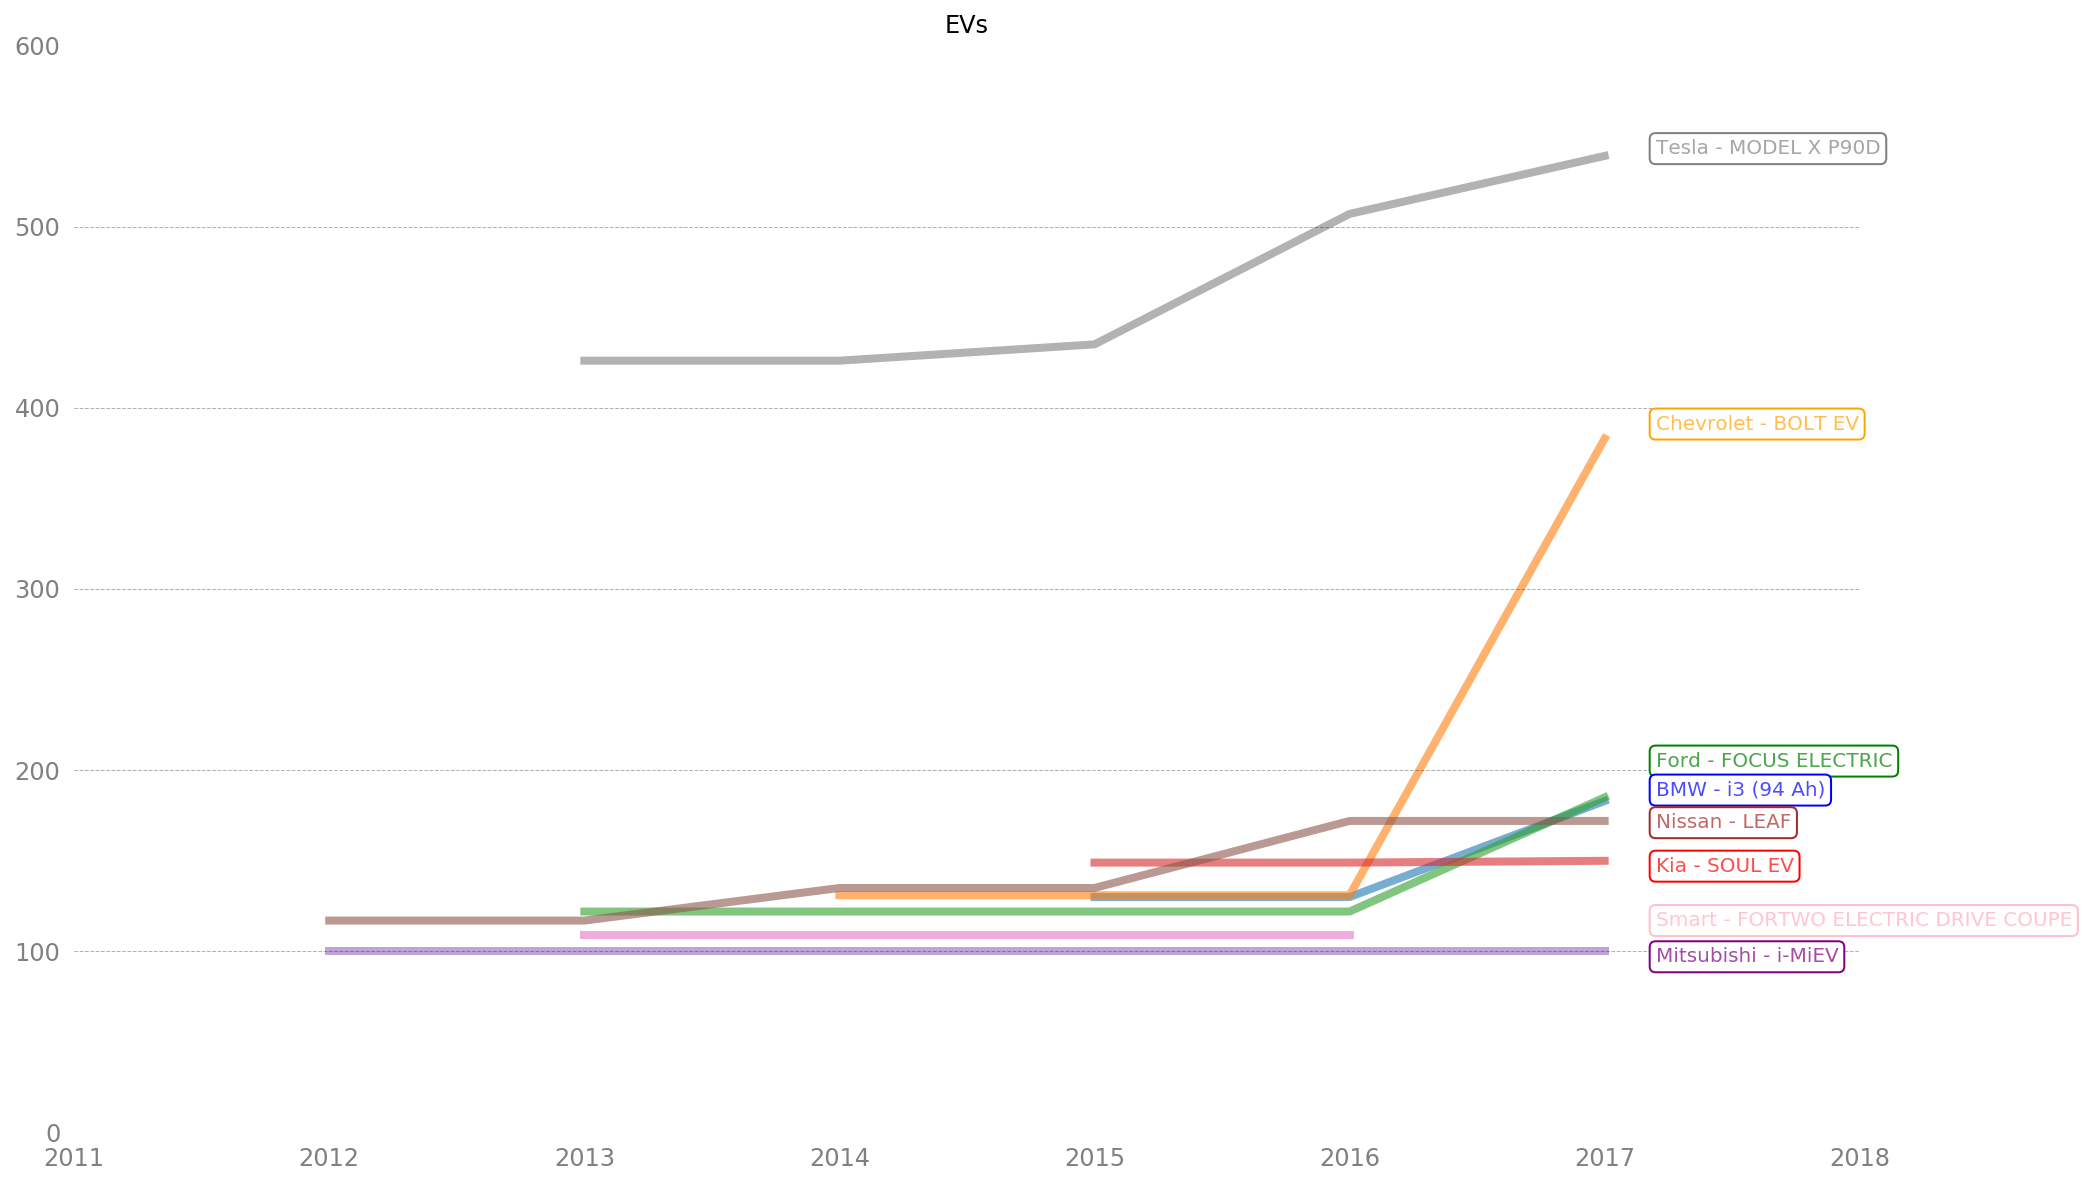

In [4]:
grouped.unstack().plot(figsize=(16,10), kind='line', lw=4 ,alpha=0.6, legend=None, title='EVs');

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.ylim(0, 600)    
plt.xlim(2011, 2018)

plt.yticks(fontsize=12, color='gray')    
plt.xticks(fontsize=12, color='gray') 

for y in range(0, 600, 100):    
    plt.plot(range(2011, 2019), [y] * len(range(2011, 2019)),"--", lw=0.5, color="black", alpha=0.3)  
#plt.legend(frameon=False)

plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on") 
plt.xlabel('');

ax.annotate('Tesla - MODEL X P90D', xy=(2017.2, 540), size= 10, alpha=0.7, color='gray', bbox={'boxstyle' :'round', 'edgecolor':'grey',  'facecolor':'1'});
ax.annotate('Chevrolet - BOLT EV', xy=(2017.2, 388), size= 10, alpha=0.7, color='orange', bbox={'boxstyle' :'round', 'edgecolor':'orange',  'facecolor':'1'});
ax.annotate('Ford - FOCUS ELECTRIC', xy=(2017.2, 202), size= 10, alpha=0.7, color='green', bbox={'boxstyle' :'round', 'edgecolor':'green',  'facecolor':'1'});
ax.annotate('BMW - i3 (94 Ah)', xy=(2017.2, 186), size= 10, alpha=0.7, color='blue', bbox={'boxstyle' :'round', 'edgecolor':'blue',  'facecolor':'1'});
ax.annotate('Nissan - LEAF', xy=(2017.2, 168), size= 10, alpha=0.7, color='brown', bbox={'boxstyle' :'round', 'edgecolor':'brown',  'facecolor':'1'});
ax.annotate('Kia - SOUL EV', xy=(2017.2, 144), size= 10, alpha=0.7, color='red', bbox={'boxstyle' :'round', 'edgecolor':'red',  'facecolor':'1'});
ax.annotate('Smart - FORTWO ELECTRIC DRIVE COUPE', xy=(2017.2, 114), size= 10, alpha=0.9, color='pink', bbox={'boxstyle' :'round', 'edgecolor':'pink',  'facecolor':'1'});
ax.annotate('Mitsubishi - i-MiEV', xy=(2017.2, 94), size= 10, alpha=0.7, color='purple', bbox={'boxstyle' :'round', 'edgecolor':'purple',  'facecolor':'1'});
#plt.savefig('EVs.png')